In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# Functions

In [2]:
def sti_vector(vec_inf, vec_sup):
    return np.append(-vec_inf, vec_sup)

In [3]:
def back_sti_vector(sti_vec):  
    mid_idx = sti_vec.shape[0] // 2
    return -sti_vec[:mid_idx], sti_vec[mid_idx:]

In [4]:
def sti_dot_mtx(matrix):
    pos = matrix.copy()
    neg = matrix.copy()
    pos[pos < 0] = 0
    neg[neg > 0] = 0
    neg = np.fabs(neg)
    return np.block([[pos, neg], [neg, pos]])

In [5]:
def diagonal_dominant(matrix):
    D = np.diag(np.abs(matrix))
    E = np.sum(np.abs(matrix), axis=1) - D 
    return np.all(D > E)


def make_diagonal_dominant(matrix):
    if diagonal_dominant(matrix):
        return matrix
    D = np.diag(np.abs(matrix))
    E = np.sum(np.abs(matrix), axis=1) - D 
    eps = 0.1
    for i in range(matrix.shape[0]):
        if D[i] - E[i] <= eps:
            matrix[i,i] += E[i] - D[i] + eps
    return matrix

In [28]:
def solve(A, b_inf, b_sup):
    sti_vec = sti_vector(b_inf, b_sup)
    
    A_block = sti_dot_mtx(A)
    
    res = np.dot(np.linalg.inv(A_block), sti_vec)
    
    x_inf, x_sup = back_sti_vector(res)

    return x_inf, x_sup

In [29]:
def heatMap(matrix, annot=False):
    div = np.max(np.fabs(matrix))
    plt.figure(figsize=(10,8))
    sns.heatmap(A, annot=annot, center=0)
    plt.title('Matrix coef')
    plt.xlabel('column')
    plt.ylabel('row')
    plt.show()

In [30]:
def graphs(x, x_inf, x_sup):
    plt.figure(figsize=(18, 8))
    plt.plot(x, label='true')
    plt.plot(x_inf, label='x_inf')
    plt.plot(x_sup, label='x_sup')
    plt.xlabel('x_index')
    plt.ylabel('value')
    plt.title('Сравнение решения с исходными значениями')
    plt.legend()
    plt.grid()
    plt.show()

# Task 1

In [31]:
A = np.array([[1 , 1],
             [0, 0.1]])

b_inf = np.array([4.1, 0.1])
b_sup = np.array([3.9, 0.3])

In [32]:
x_inf, x_sup = solve(A, b_inf, b_sup)

In [33]:
np.array((x_inf, x_sup)).T

array([[3.1, 0.9],
       [1. , 3. ]])

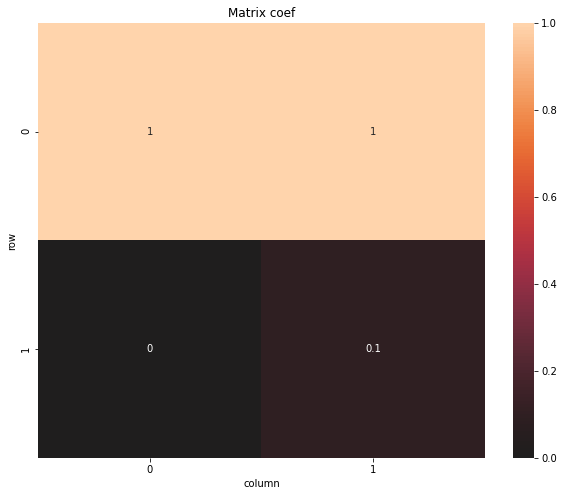

In [34]:
heatMap(A, True)

# Task 2

In [35]:
def get_square(matrix):
    result_n = min(matrix.shape[0], matrix.shape[1])
    return matrix[:result_n,:result_n]

In [36]:
def generate_right_part(matrix):
    n = matrix.shape[0]
    x = np.random.uniform(low=1, high=5, size=n)
    b = np.dot(matrix, x)  # get right part
    rads = np.random.uniform(low=0.5, high=2, size=n)  # generate radiuses for b
    b_inf = b - rads  # make b interval
    b_sup = b + rads
    return b_inf, b_sup, x

In [37]:
inputs = ['matrix_n_phi_1.txt',
         'matrix_n_phi_6.txt']

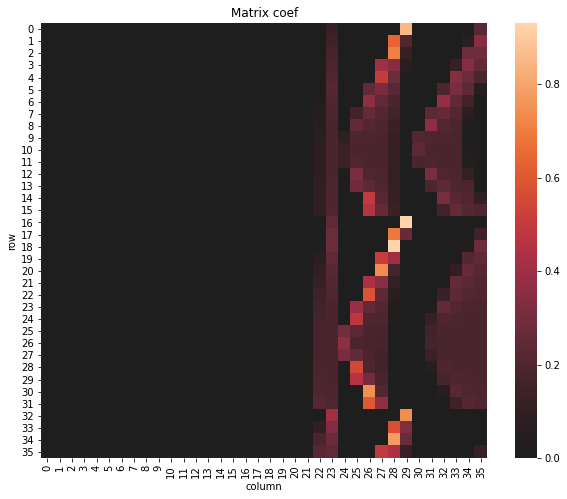

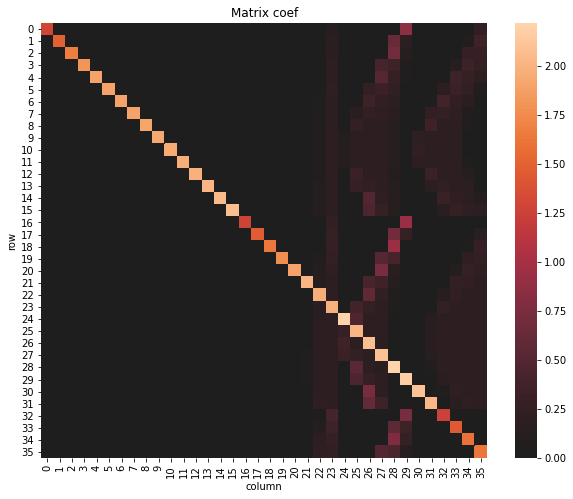

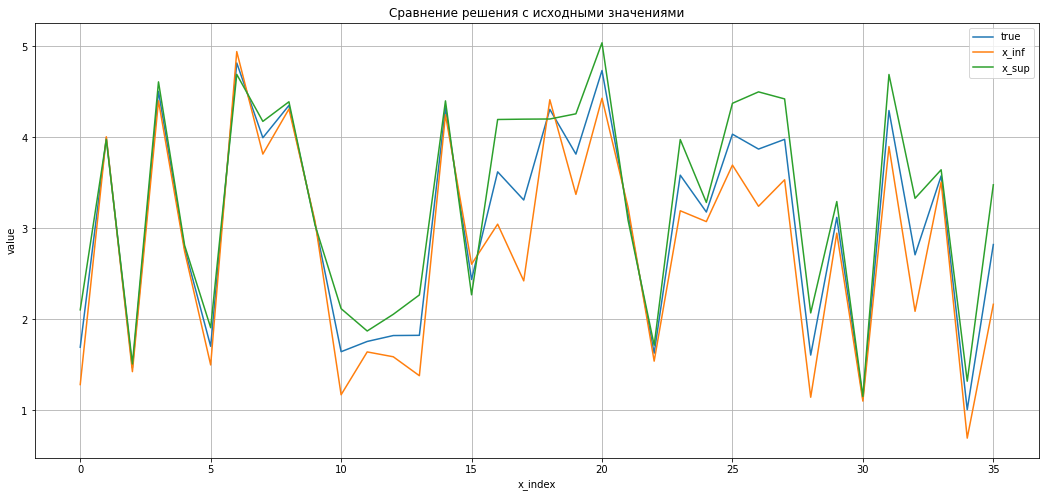

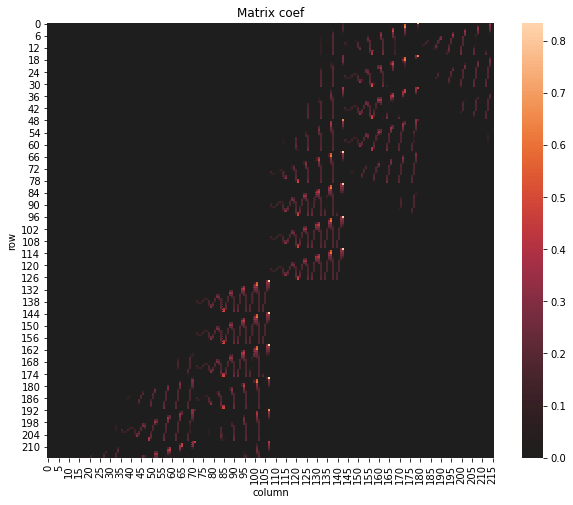

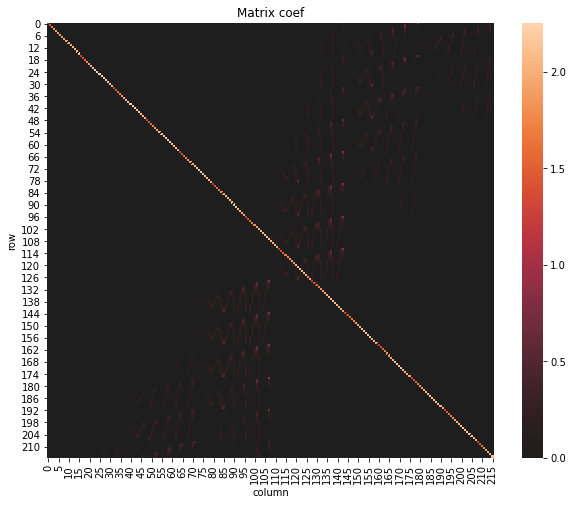

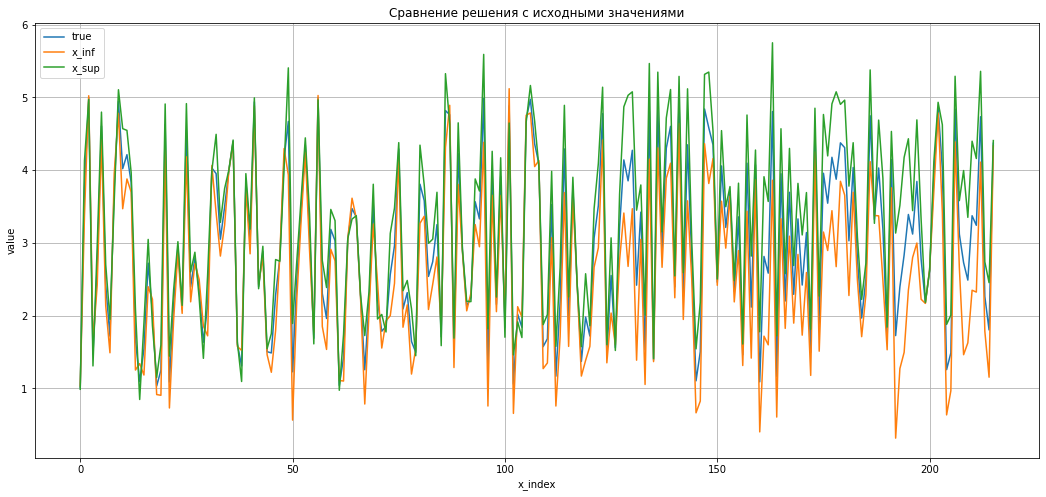

In [40]:
result = []
for file in inputs:
    A = np.loadtxt(file)
    A = get_square(A)
    heatMap(A)
    A = make_diagonal_dominant(A)
    
    b_inf, b_sup, x = generate_right_part(A)

    
    x_inf, x_sup = (solve(A, b_inf, b_sup))
    
    heatMap(A)
    
    graphs(x, x_inf, x_sup)